### Problem description: Titanic Dataset Analysis

Part A: Convert categorical features(sex,Embarked) to numerical using Label Encoding

Part B: Apply StandardScaler normalization, train a linear regression model , and identify important features using a correlation matrix (heatmap)

Part C: Evaluate the model on an 80/20 train-test split using prediction accuracy, MAE,RMSE,Precision, and F1-score

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,accuracy_score,precision_score,recall_score,f1_score

In [3]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
le_sex = LabelEncoder()
df['sex_encoded'] = le_sex.fit_transform(df['sex'])
df['sex_encoded']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: sex_encoded, Length: 891, dtype: int64

In [5]:
le_embarked = LabelEncoder()
df['embarked_encoded'] = le_embarked.fit_transform(df['embarked'])
df['embarked_encoded']

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: embarked_encoded, Length: 891, dtype: int64

In [7]:
df_model = df.select_dtypes(include=np.number)
df_model

,survived,pclass,age,sibsp,parch,fare,sex_encoded,embarked_encoded
0,0,3,22.0,1,0,7.2500,1,2
1,1,1,38.0,1,0,71.2833,0,0
2,1,3,26.0,0,0,7.9250,0,2
3,1,1,35.0,1,0,53.1000,0,2
4,0,3,35.0,0,0,8.0500,1,2
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,1,2
887,1,1,19.0,0,0,30.0000,0,2
888,0,3,NaN,1,2,23.4500,0,2
889,1,1,26.0,0,0,30.0000,1,0


In [8]:
df_model.isna().sum()

survived              0
pclass                0
age                 177
sibsp                 0
parch                 0
fare                  0
sex_encoded           0
embarked_encoded      0
dtype: int64

In [9]:
df_model['age'].fillna(df_model['age'].mean(),inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11748\1484167020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_model['age'].fillna(df_model['age'].mean(),inplace=True)


In [13]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_model)
df_scaled = pd.DataFrame(df_scaled,columns=numeric_cols)

In [15]:
df_scaled

,survived,pclass,age,sibsp,parch,fare,sex_encoded,embarked_encoded
0,-0.789272,0.827377,-0.592481,0.432793,-0.473674,-0.502445,0.737695,0.581114
1,1.266990,-1.566107,0.638789,0.432793,-0.473674,0.786845,-1.355574,-1.938460
2,1.266990,0.827377,-0.284663,-0.474545,-0.473674,-0.488854,-1.355574,0.581114
3,1.266990,-1.566107,0.407926,0.432793,-0.473674,0.420730,-1.355574,0.581114
4,-0.789272,0.827377,0.407926,-0.474545,-0.473674,-0.486337,0.737695,0.581114
...,...,...,...,...,...,...,...,...
886,-0.789272,-0.369365,-0.207709,-0.474545,-0.473674,-0.386671,0.737695,0.581114
887,1.266990,-1.566107,-0.823344,-0.474545,-0.473674,-0.044381,-1.355574,0.581114
888,-0.789272,0.827377,0.000000,0.432793,2.008933,-0.176263,-1.355574,0.581114
889,1.266990,-1.566107,-0.284663,-0.474545,-0.473674,-0.044381,0.737695,-1.938460


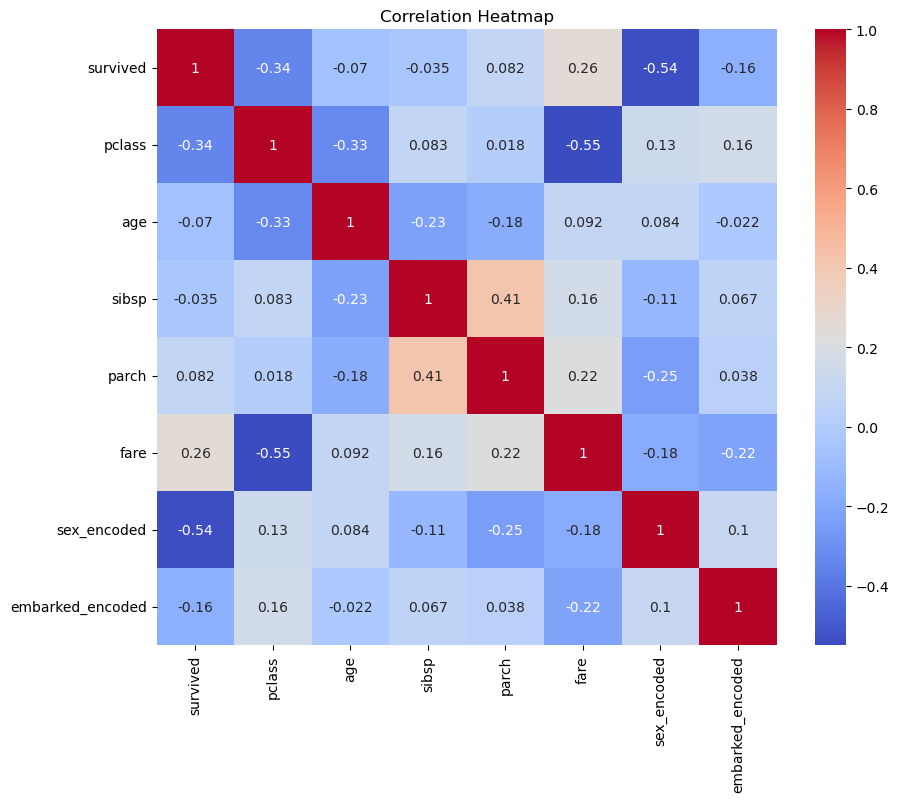

In [16]:
plt.figure(figsize=(10,8))
corr_matrix = df_scaled.corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [17]:
important_features = corr_matrix['survived'].abs().sort_values(ascending=False)
print(important_features)

survived            1.000000
sex_encoded         0.543351
pclass              0.338481
fare                0.257307
embarked_encoded    0.163517
parch               0.081629
age                 0.069809
sibsp               0.035322
Name: survived, dtype: float64


In [18]:
X = df_scaled
y = df_scaled['survived']

In [21]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
lr_model = LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred = lr_model.predict(x_test)

In [27]:
# linear regression predicts continuous values; convert to 0/1 for classification metrics

y_pred_class = (y_pred >=0.5).astype(int)

mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))

mae

9.160890543974058e-16

In [28]:
rmse

np.float64(1.0888991964862005e-15)